In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 


In [3]:
df=pd.read_csv('bengaluru_house_prices.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [5]:
df.shape

(13320, 9)

In [6]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [7]:
df.drop(['area_type','availability','society'],axis='columns',inplace=True)
df.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [8]:
df['size'].unique()


array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [9]:
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]) if isinstance(x, str) else None)


In [10]:
df['bhk'].unique()

array([ 2.,  4.,  3.,  6.,  1.,  8.,  7.,  5., 11.,  9., nan, 27., 10.,
       19., 16., 43., 14., 12., 13., 18.])

In [11]:
df.drop('size',axis='columns',inplace=True)

In [12]:
df.head()

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056,2.0,1.0,39.07,2.0
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4.0
2,Uttarahalli,1440,2.0,3.0,62.00,3.0
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3.0
4,Kothanur,1200,2.0,1.0,51.00,2.0


In [15]:
df.isna().sum()

location        1
total_sqft      0
bath           73
balcony       609
price           0
bhk            16
dtype: int64

In [14]:
df1=df.dropna()
df1.head()

,location,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,1056,2.0,1.0,39.07,2.0
1,Chikka Tirupathi,2600,5.0,3.0,120.00,4.0
2,Uttarahalli,1440,2.0,3.0,62.00,3.0
3,Lingadheeranahalli,1521,3.0,1.0,95.00,3.0
4,Kothanur,1200,2.0,1.0,51.00,2.0


In [16]:
df1.isna().sum()

location      0
total_sqft    0
bath          0
balcony       0
price         0
bhk           0
dtype: int64

In [17]:
df1.bhk.unique()

array([ 2.,  4.,  3.,  1.,  6.,  8.,  7.,  5., 11.,  9., 27., 43., 14.,
       12., 10., 13.])

In [18]:
df1['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [19]:
def is_float(x):
    try:
        float(x)
    except:
        return False 
    return True

In [20]:
df1[~df1['total_sqft'].apply(is_float)].head(10)

,location,total_sqft,bath,balcony,price,bhk
30,Yelahanka,2100 - 2850,4.0,0.0,186.000,4.0
122,Hebbal,3067 - 8156,4.0,0.0,477.000,4.0
137,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2.0
165,Sarjapur,1145 - 1340,2.0,0.0,43.490,2.0
188,KR Puram,1015 - 1540,2.0,0.0,56.800,2.0
410,Kengeri,34.46Sq. Meter,1.0,0.0,18.500,1.0
549,Hennur Road,1195 - 1440,2.0,0.0,63.770,2.0
661,Yelahanka,1120 - 1145,2.0,0.0,48.130,2.0
672,Bettahalsoor,3090 - 5002,4.0,0.0,445.000,4.0
772,Banashankari Stage VI,1160 - 1195,2.0,0.0,59.935,2.0


In [30]:
def get_range(x):
    try:
        tokens = x.split('-')
        if len(tokens) == 2:
            return (float(tokens[0].strip()) + float(tokens[1].strip())) / 2
        return float(x.strip())
    except ValueError:
        return None

df1['total_sqft'] = df1['total_sqft'].apply(get_range)


C:\Users\Arnitha\AppData\Local\Temp\ipykernel_17460\2928112551.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['total_sqft'] = df1['total_sqft'].apply(get_range)


In [31]:

df1['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [51]:
print(df1['location'].head())


0    Electronic City Phase II
1            Chikka Tirupathi
2                 Uttarahalli
3          Lingadheeranahalli
4                    Kothanur
Name: location, dtype: object


In [52]:
df1['location'] = df1['location'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)
print(df1['location'].head())


0    Electronic City Phase II
1            Chikka Tirupathi
2                 Uttarahalli
3          Lingadheeranahalli
4                    Kothanur
Name: location, dtype: object


C:\Users\Arnitha\AppData\Local\Temp\ipykernel_17460\3514361624.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['location'] = df1['location'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)


In [53]:
df2 = df1.copy()
df2['price_per_sqft'] = df2['price'] * 100000 / df2['total_sqft']
print(df2.head())


                   location  total_sqft  bath  balcony   price  bhk  \
0  Electronic City Phase II      1056.0   2.0      1.0   39.07  2.0   
1          Chikka Tirupathi      2600.0   5.0      3.0  120.00  4.0   
2               Uttarahalli      1440.0   2.0      3.0   62.00  3.0   
3        Lingadheeranahalli      1521.0   3.0      1.0   95.00  3.0   
4                  Kothanur      1200.0   2.0      1.0   51.00  2.0   

   price_per_sqft  
0     3699.810606  
1     4615.384615  
2     4305.555556  
3     6245.890861  
4     4250.000000  


In [54]:
len(df2.location.unique())

1265

In [55]:
location_stats = df2['location'].value_counts(ascending=False)
print(location_stats)


location
Whitefield            514
Sarjapur  Road        372
Electronic City       300
Kanakpura Road        261
Thanisandra           231
                     ... 
Milk Colony             1
Sundara Nagar           1
Jaladarsini Layout      1
Madanayakahalli         1
Abshot Layout           1
Name: count, Length: 1265, dtype: int64


In [57]:
location_stats_less=location_stats[location_stats<=10]
location_stats_less

location
Kalkere               10
Gunjur Palya          10
Naganathapura         10
HAL 2nd Stage         10
Ganga Nagar           10
                      ..
Milk Colony            1
Sundara Nagar          1
Jaladarsini Layout     1
Madanayakahalli        1
Abshot Layout          1
Name: count, Length: 1028, dtype: int64

In [59]:
df2['location']=df2['location'].apply(lambda x:'other' if x in location_stats_less else x)
df2.head(10)

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2.0,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4.0,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3.0,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3.0,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2.0,4250.000000
5,Whitefield,1170.0,2.0,1.0,38.00,2.0,3247.863248
8,Marathahalli,1310.0,3.0,1.0,63.25,3.0,4828.244275
10,Whitefield,1800.0,2.0,2.0,70.00,3.0,3888.888889
11,Whitefield,2785.0,5.0,3.0,295.00,4.0,10592.459605
12,7th Phase JP Nagar,1000.0,2.0,1.0,38.00,2.0,3800.000000


In [60]:
len(df2['location'].unique())

238

In [61]:
df2[df2.total_sqft/df2.bhk<300].head()

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
58,Murugeshpalya,1407.0,4.0,1.0,150.0,6.0,10660.980810
68,other,1350.0,7.0,0.0,85.0,8.0,6296.296296
70,other,500.0,3.0,2.0,100.0,3.0,20000.000000
78,Kaval Byrasandra,460.0,1.0,0.0,22.0,2.0,4782.608696
89,Rajaji Nagar,710.0,6.0,3.0,160.0,6.0,22535.211268


In [62]:
df3=df2[~(df2.total_sqft/df2.bhk<300)]
df3.shape

(12055, 7)

In [63]:
df3.price_per_sqft.describe()

count     12013.000000
mean       6206.082347
std        3985.518807
min         267.829813
25%        4199.363057
50%        5252.525253
75%        6823.529412
max      176470.588235
Name: price_per_sqft, dtype: float64

In [64]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df4=remove_pps_outliers(df3)
df4.shape

(9849, 7)

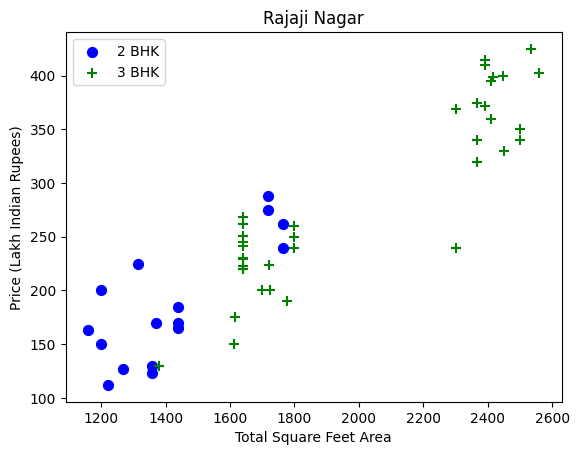

In [65]:
import matplotlib.pyplot as plt
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(df4,"Rajaji Nagar")

In [66]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [67]:
df5=remove_bhk_outliers(df4)

In [68]:
df5.shape

(7038, 7)

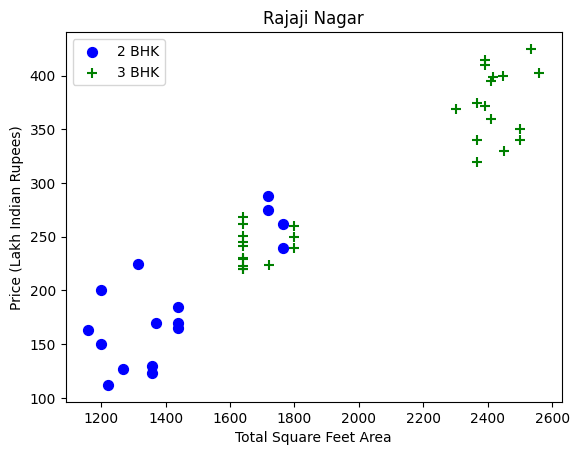

In [69]:

plot_scatter_chart(df5,"Rajaji Nagar")

Text(0, 0.5, 'Count')

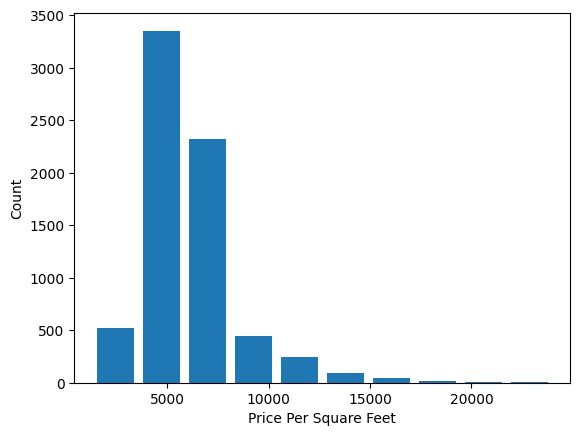

In [70]:
import matplotlib
plt.hist(df5.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [71]:
df5.bath.unique()

array([ 2.,  3.,  4.,  8.,  1.,  5.,  6.,  7.,  9., 13.])

Text(0, 0.5, 'Count')

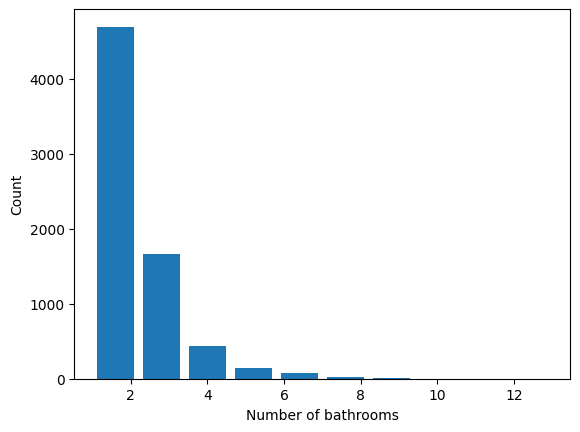

In [73]:
plt.hist(df5.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [74]:

df5[df5.bath>df5.bhk+2]  #It is unusual to have 2 more bathrooms than number of bedrooms in a home

,location,total_sqft,bath,balcony,price,bhk,price_per_sqft
1552,Chikkabanavar,2460.0,7.0,2.0,80.0,4.0,3252.032520
6439,Thanisandra,1806.0,6.0,2.0,116.0,3.0,6423.034330
8083,other,11338.0,9.0,1.0,1000.0,6.0,8819.897689


In [79]:
df6=df5[df5.bath<df5.bhk+2]
df6.shape

(6971, 7)

In [81]:
df7=df6.drop('price_per_sqft',axis='columns')
df7.head()

,location,total_sqft,bath,balcony,price,bhk
1,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2.0
2,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2.0
3,Devarachikkanahalli,1170.0,2.0,2.0,40.0,2.0
4,Devarachikkanahalli,1425.0,2.0,2.0,65.0,3.0
5,Devarachikkanahalli,947.0,2.0,2.0,43.0,2.0


In [94]:
dummies=pd.get_dummies(df7['location'])
dummies

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9839,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9841,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9842,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
9845,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [95]:
df8=pd.concat([df7,dummies],axis='columns')
df8.drop(['location','other'],axis='columns',inplace=True)
df8.head()

,total_sqft,bath,balcony,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
1,1250.0,2.0,2.0,40.0,2.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1200.0,2.0,2.0,83.0,2.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1170.0,2.0,2.0,40.0,2.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1425.0,2.0,2.0,65.0,3.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,947.0,2.0,2.0,43.0,2.0,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [96]:
df8.shape

(6971, 242)

In [98]:
x=df8.drop('price',axis='columns')
y=df8['price']

In [102]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [103]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.8404738279940637

In [106]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.78828391, 0.77893808, 0.86637107, 0.77359851, 0.87114947])

In [114]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


In [121]:
def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['squared_error', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])



best_models = find_best_model_using_gridsearchcv(x, y)
print(best_models)


               model  best_score  \
0  linear_regression    0.815668   
1              lasso    0.691836   
2      decision_tree    0.583222   

                                         best_params  
0                            {'fit_intercept': True}  
1                {'alpha': 1, 'selection': 'random'}  
2  {'criterion': 'friedman_mse', 'splitter': 'ran...  


In [126]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(x.columns==location)[0][0]

    t = np.zeros(len(x.columns))
    t[0] = sqft
    t[1] = bath
    t[2] = bhk
    if loc_index >= 0:
        t[loc_index] = 1

    return lr_clf.predict([t])[0]

In [127]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

c:\Users\Arnitha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


91.92814013537301

In [128]:
predict_price('1st Phase JP Nagar',1000, 3, 3)

c:\Users\Arnitha\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


90.71662676741279

In [129]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [130]:
import json
columns = {
    'data_columns' : [col.lower() for col in x_train.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))